<a href="https://colab.research.google.com/github/aiaaee/Student-Dropout-Success-Prediction/blob/main/Student_Dropout_%26_Success_Prediction_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [ ]:
!pip install dython

In [ ]:
from zipfile import ZipFile
from dython.nominal import associations
import pandas as pd
from scipy.stats import f_oneway
import plotly.express as px
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder , StandardScaler , MinMaxScaler , OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression , Ridge, Lasso , LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import plotly.express as px
from sklearn.pipeline import make_pipeline
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score
import seaborn as sns

### Extraction

In [ ]:
with ZipFile("/content/archive (8).zip", 'r') as Unzip:
    Unzip.extractall(path="./")

In [ ]:
data = pd.read_csv('/content/students_dropout_academic_success.csv')

In [ ]:
data.head(5)

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

### Explority Data Analysis

In [ ]:
x= data['target']
figure = go.Figure(go.Histogram(x=x , histnorm='density' , marker=dict(color=['cyan' , 'brown' , 'green'] )))
figure.update_layout(title='Histogram Plot for Analysing Student Dropout & Success')
figure.show()

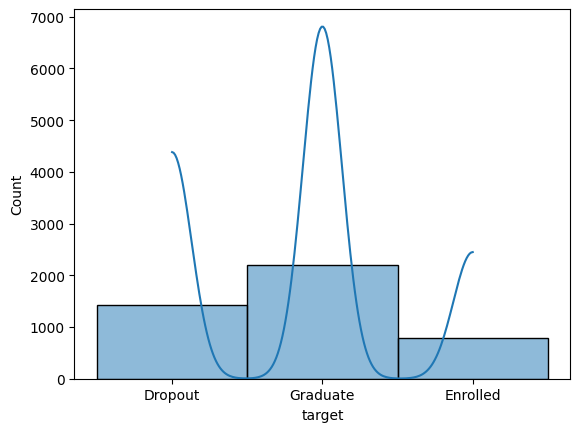

In [ ]:
sns.histplot(data=data, x='target', kde=True)
plt.show()

In [ ]:
fig = go.Figure(data=go.Pie(labels=data['target'] , values=data['Nacionality']))
fig.show()

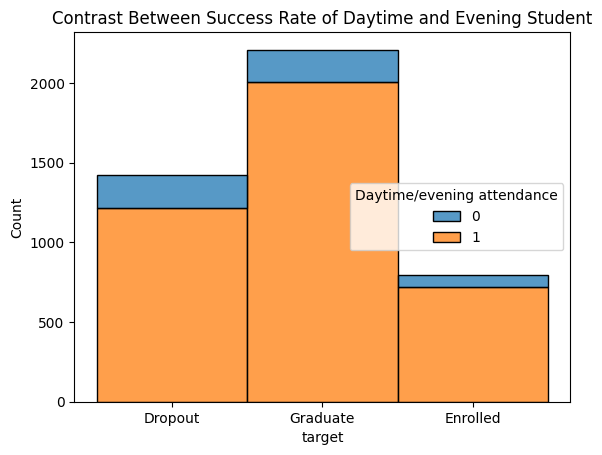

In [ ]:
sns.histplot(x='target', hue='Daytime/evening attendance', data=data, multiple='stack')
plt.title('Contrast Between Success Rate of Daytime and Evening Student')
plt.show()

In [ ]:
# Admission grade : Entry grade into the university
fig = go.Figure(data=go.Scattergl(x=data['Admission grade'], y=data['target'], mode='markers'))
fig.show()

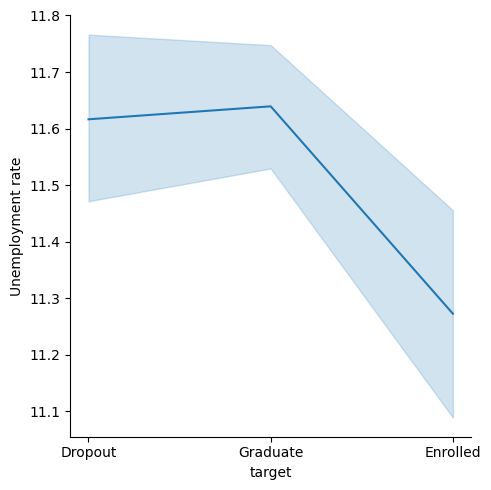

In [ ]:
# Unemployment rate : National unemployment rate at enrollment.
sns.relplot(x='target' , y='Unemployment rate' , data=data , kind='line')

<Axes: xlabel='target', ylabel="Father's qualification">

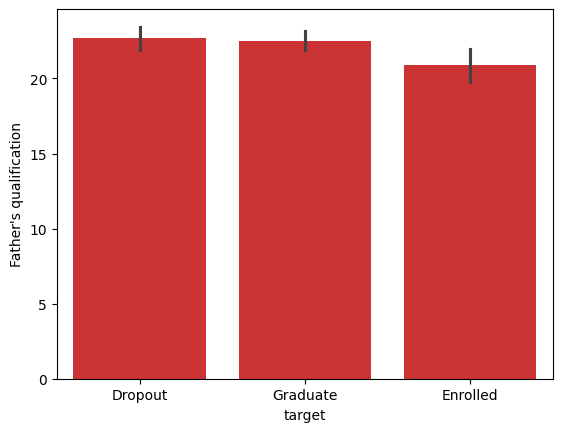

In [ ]:
# Father's Qualification : Job type/category of the father
sns.barplot(x='target' , y='Father\'s qualification' , data=data , color=sns.set_palette('Set1'))

<Axes: xlabel='Age at enrollment', ylabel='target'>

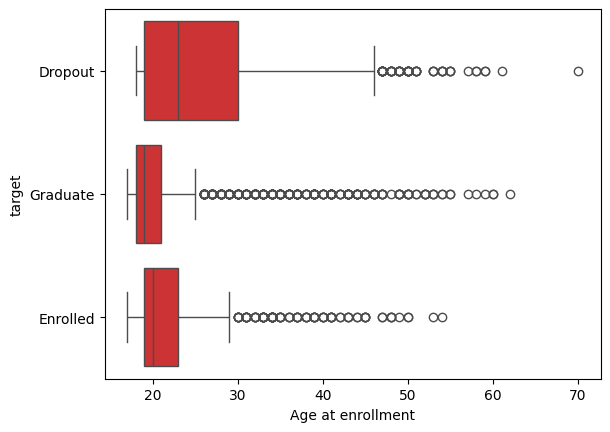

In [ ]:
# Age at Enrollment: Age (in years) at the time of enrollment.
sns.boxplot(x='Age at enrollment' , y='target' , data=data)

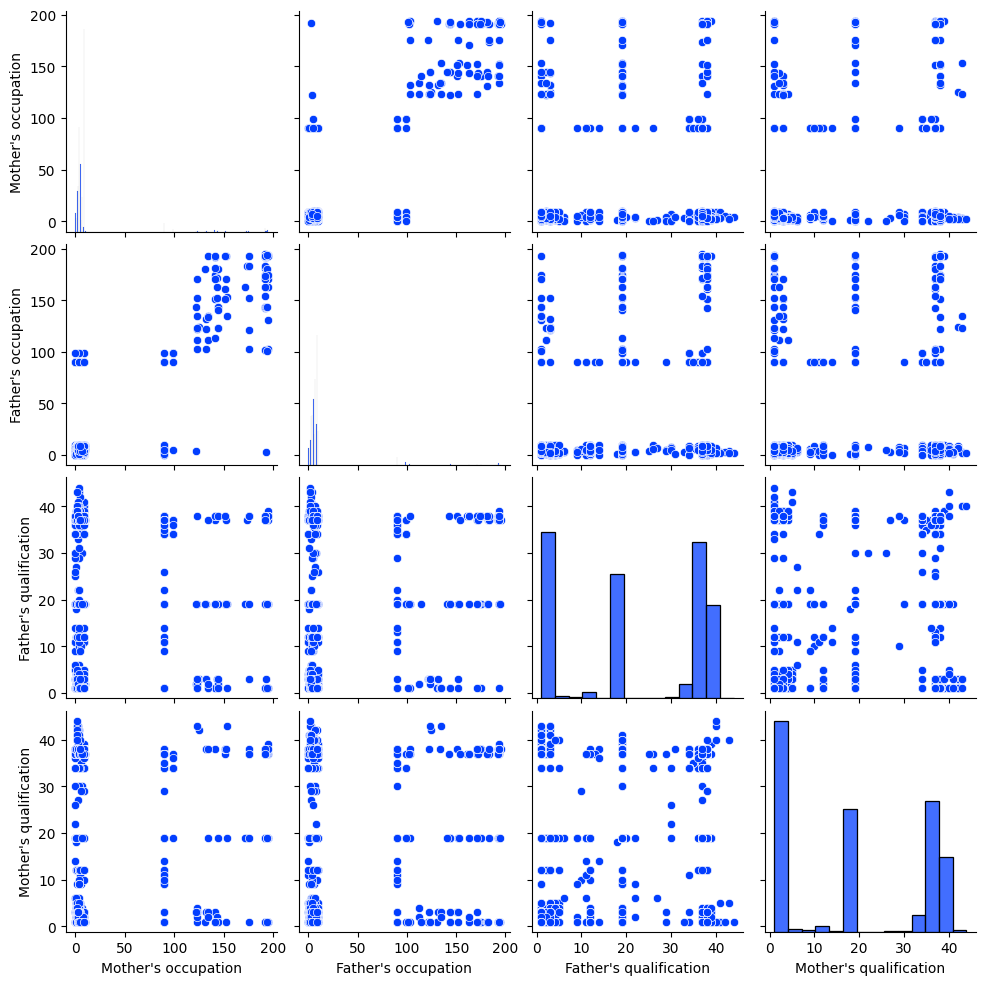

In [ ]:
data_organized = data.loc[: , ['target', 'Mother\'s occupation' , 'Father\'s occupation' , 'Father\'s qualification' , 'Mother\'s qualification']]
sns.pairplot(data_organized , palette=sns.set_palette('bright'))

<Figure size 2000x1400 with 0 Axes>

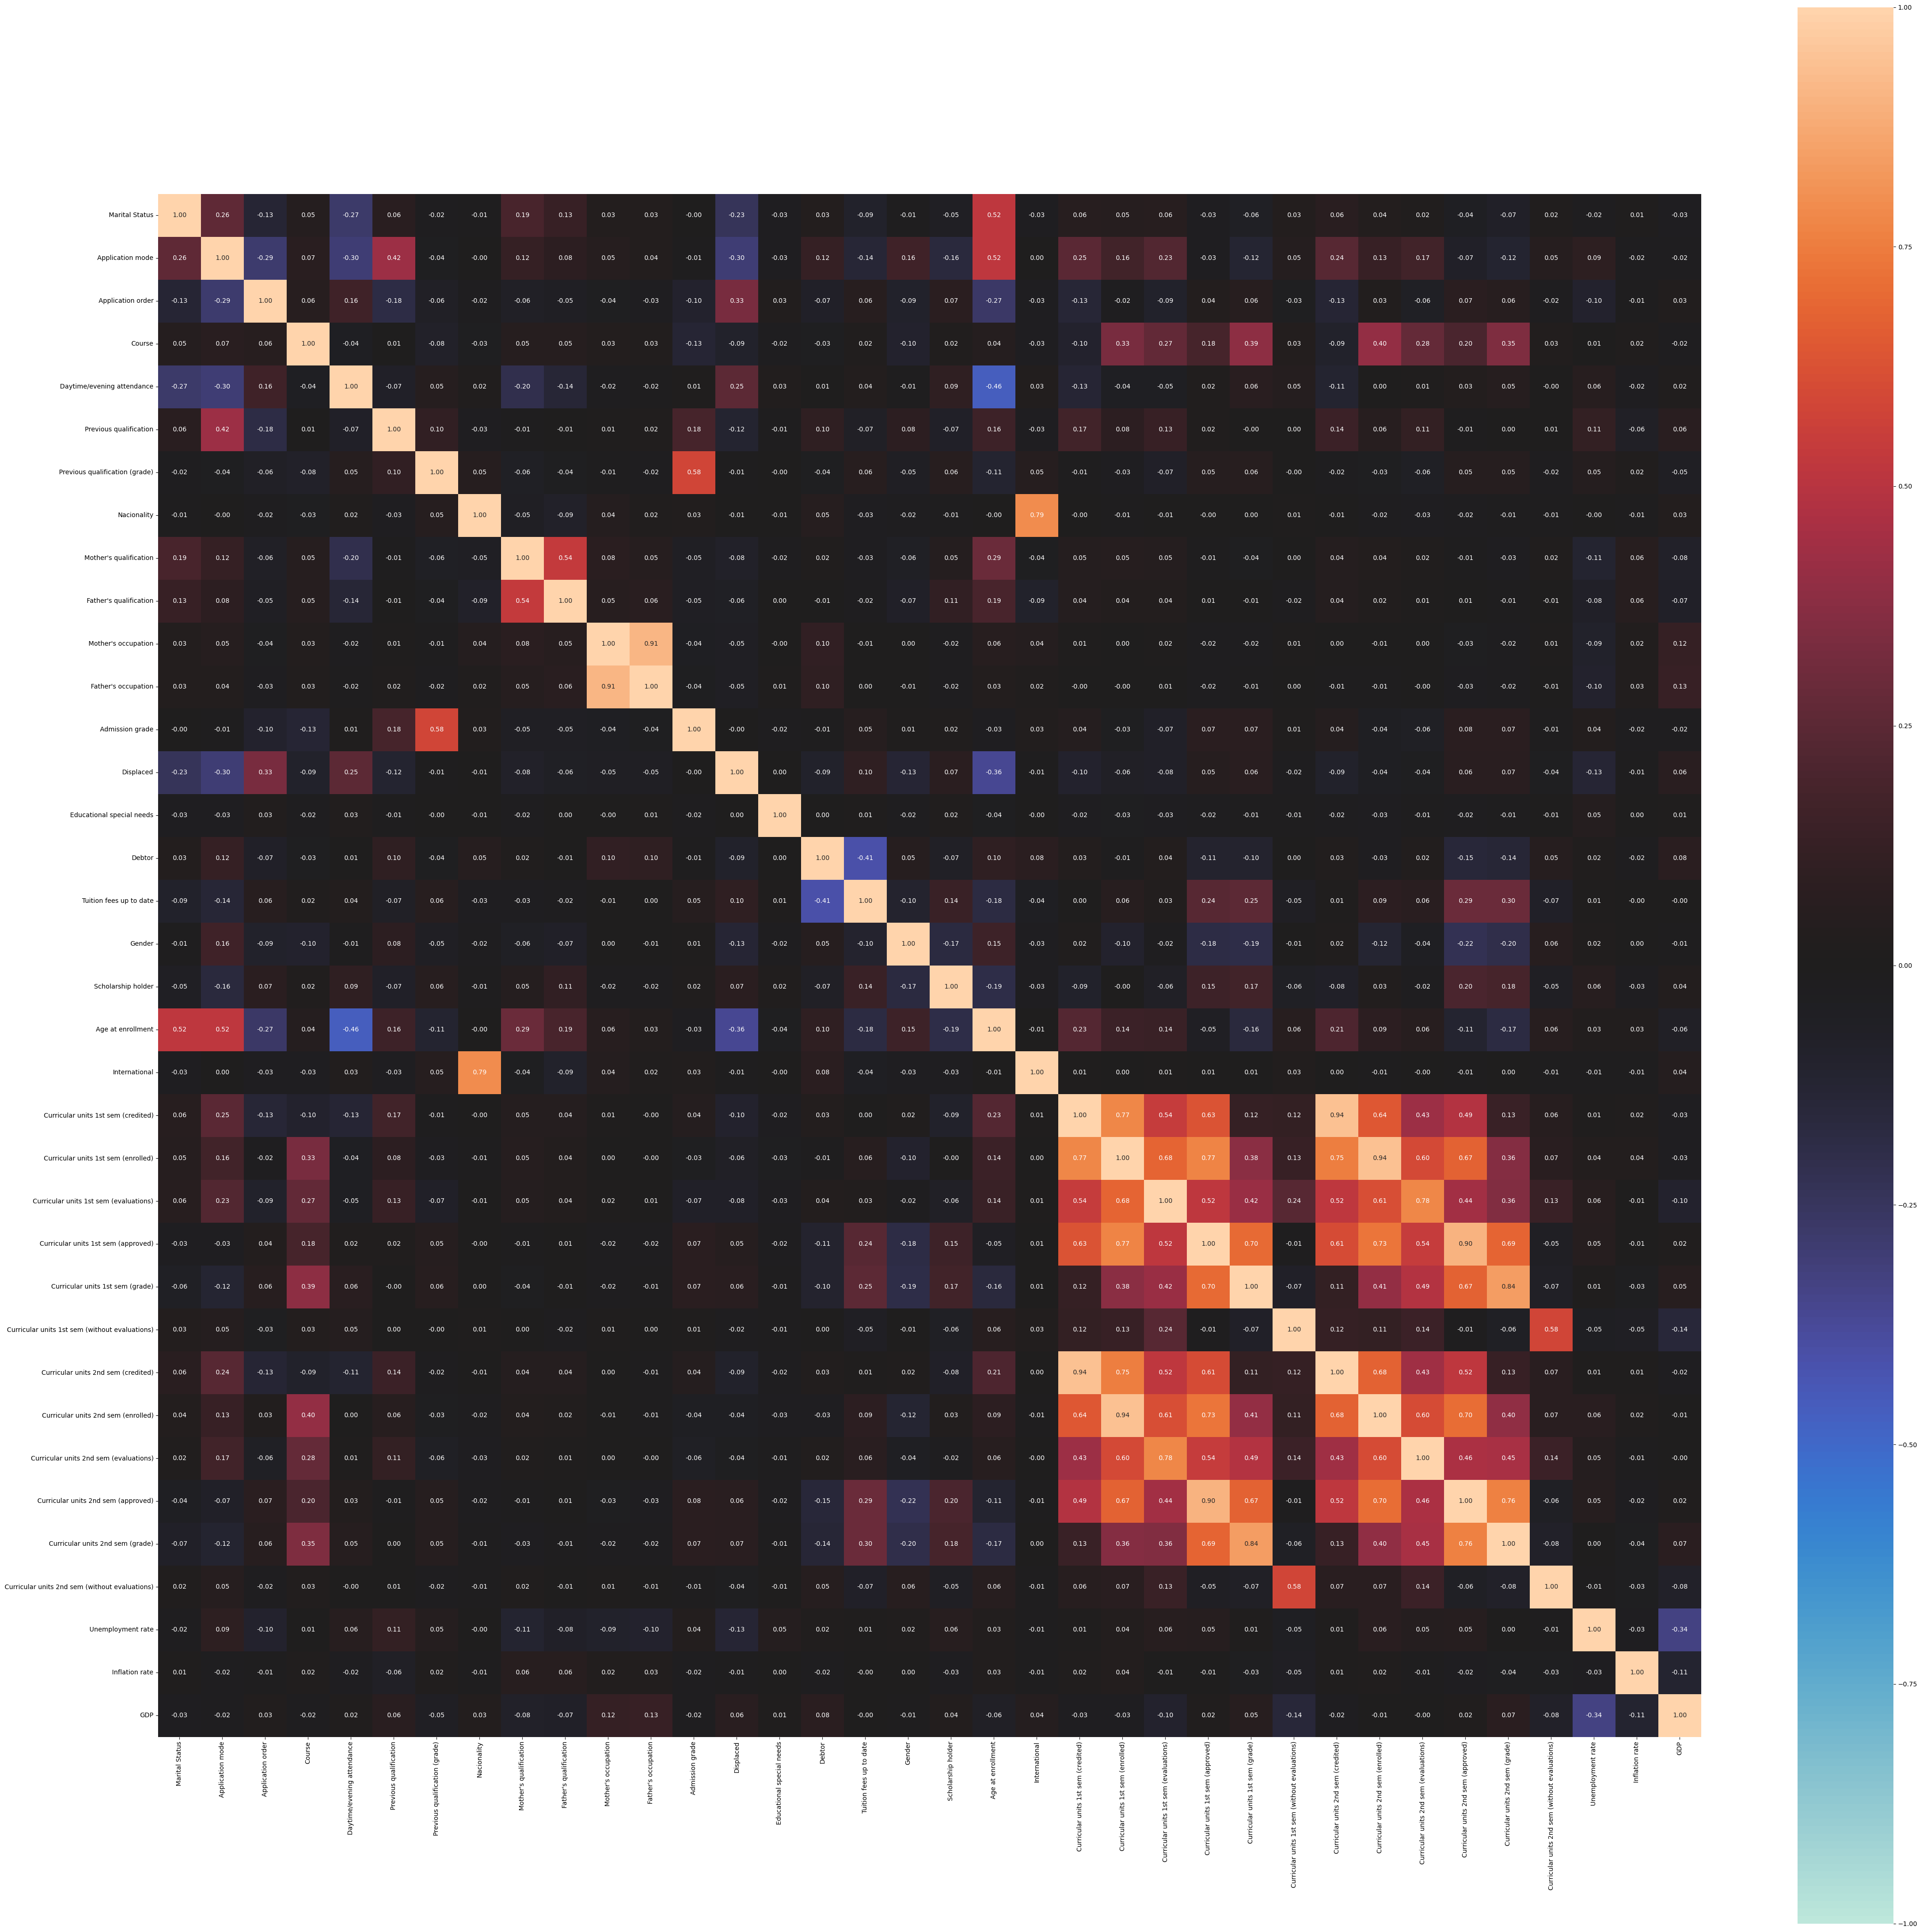

<Figure size 2000x1400 with 0 Axes>

In [ ]:
numeric_values = data.drop('target' , axis=1)
correlation_matrix = associations(numeric_values, plot=False)['corr']
plt.figure(figsize=(20, 14))

In [ ]:
target_col = 'target'
numeric_cols = data.select_dtypes(include=['int' , 'float']).columns.tolist()
anova_results = {}
groups = data.groupby(target_col)
for feature in numeric_cols:
    group_values = [group[feature].dropna().values for name, group in groups]

    f_stat, p_value = f_oneway(*group_values)
    anova_results[feature] = p_value
sorted_results = sorted(anova_results.items(), key=lambda x: x[1])
for feature, p in sorted_results:
    print(f"{feature}: p-value = {p:.4f}")

Curricular units 2nd sem (approved): p-value = 0.0000
Curricular units 2nd sem (grade): p-value = 0.0000
Curricular units 1st sem (approved): p-value = 0.0000
Curricular units 1st sem (grade): p-value = 0.0000
Tuition fees up to date: p-value = 0.0000
Scholarship holder: p-value = 0.0000
Age at enrollment: p-value = 0.0000
Debtor: p-value = 0.0000
Gender: p-value = 0.0000
Application mode: p-value = 0.0000
Curricular units 2nd sem (evaluations): p-value = 0.0000
Curricular units 2nd sem (enrolled): p-value = 0.0000
Curricular units 1st sem (enrolled): p-value = 0.0000
Curricular units 1st sem (evaluations): p-value = 0.0000
Admission grade: p-value = 0.0000
Displaced: p-value = 0.0000
Previous qualification (grade): p-value = 0.0000
Curricular units 2nd sem (without evaluations): p-value = 0.0000
Marital Status: p-value = 0.0000
Application order: p-value = 0.0000
Daytime/evening attendance: p-value = 0.0000
Mother's qualification: p-value = 0.0000
Curricular units 1st sem (without eva

In [ ]:
data.head(3)

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout


In [ ]:
target_col = 'target'
numeric_cols = data.select_dtypes(include=['number' , 'float' , 'int']).columns.tolist()
groups = data.groupby(target_col)
anova_results = {}
for feature in numeric_cols:
    group_values = [group[feature].dropna().values for name, group in groups]
    f_stat, p_value = f_oneway(*group_values)
    anova_results[feature] = p_value
anova_df = pd.DataFrame(anova_results.items(), columns=['Feature', 'P_Value'])
anova_df = anova_df.sort_values(by='P_Value')
fig = px.bar(
    anova_df,
    x='P_Value',
    y='Feature',
    orientation='h',
    color='P_Value',
    color_continuous_scale='Viridis',
    title=" Numerical Features in ANOVA ",
    labels={'P_Value': 'P-Value', 'Feature': 'Feature'}
)
fig.add_vline(x=0.05, line_dash='dash', line_color='red',
              annotation_text="Significance Threshold (0.05)",
              annotation_position="top left")
fig.update_layout(
    yaxis=dict(autorange='reversed'),
    xaxis_title='P-Value',
    yaxis_title='Features',
    title_font_size=18,
    height=600
)
fig.show()

In [ ]:
from scipy.stats import f_oneway
count = 0
for col in numeric_cols:
    groups = [data[data['target'] == label][col] for label in data['target'].unique()]
    f_stat, p_val = f_oneway(*groups)
anova_results = []
for col in numeric_cols:
    groups = [data[data['target'] == label][col] for label in data['target'].unique()]
    f_stat, p_val = f_oneway(*groups)
    anova_results.append({'Feature': col, 'F_statistic': f_stat, 'p_value': p_val})
anova_df = pd.DataFrame(anova_results)
significant = anova_df[anova_df['p_value'] < 0.05]
significant_sorted = significant.sort_values(by='F_statistic', ascending=False)

feature_importance = significant_sorted.head(12).Feature.tolist()
significant_sorted

,Feature,F_statistic,p_value
30,Curricular units 2nd sem (approved),1410.732938,0.000000e+00
31,Curricular units 2nd sem (grade),1134.109544,0.000000e+00
24,Curricular units 1st sem (approved),859.866768,3.649472e-316
25,Curricular units 1st sem (grade),713.517328,2.803052e-269
16,Tuition fees up to date,505.621429,1.784950e-198
18,Scholarship holder,225.751437,4.436825e-94
19,Age at enrollment,154.712071,1.138849e-65
15,Debtor,137.647527,1.018223e-58
17,Gender,123.041811,9.950346e-53
1,Application mode,114.534956,3.190893e-49


### Data Processing

In [ ]:
data_selected = data.loc[: , feature_importance]
data_selected.head(3)

,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Tuition fees up to date,Scholarship holder,Age at enrollment,Debtor,Gender,Application mode,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (enrolled)
0,0,0.000000,0,0.0,1,0,20,0,1,17,0,0
1,6,13.666667,6,14.0,0,0,19,0,1,15,6,6
2,0,0.000000,0,0.0,0,0,19,0,1,1,0,6


In [ ]:
LE = LabelEncoder()
data['target'] = LE.fit_transform(data['target'])

In [ ]:
X = data_selected
y = data['target']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [ ]:
str_attr = []
num_attr = []
for i in data_selected.columns :
  if(data_selected[i].dtypes == 'O'):
    str_attr.append(i)
  elif (data_selected[i].dtypes == 'int' or data_selected[i].dtypes == 'float'):
    num_attr.append(i)

In [ ]:
def Model_Prediction(model , X_train , X_test , y_train , y_test , string_attribute=[] , number_attribute=[]) :
  cat_process = make_pipeline(
    SimpleImputer(strategy='most_frequent') ,
    OneHotEncoder() ,
  )

  num_process = make_pipeline(
    SimpleImputer(strategy='median') ,
    StandardScaler() ,
  )

  preprocessing = ColumnTransformer([
    ('Categorical preprocessing' , cat_process , string_attribute) ,
    ("Numerical preprocessing" , num_process , number_attribute)
  ])

  model = make_pipeline(preprocessing , model)
  model.fit(X_train , y_train)

  y_pred = model.predict(X_test)

  print("--------Evaluation Metrics---------")
  accuracy = accuracy_score(y_test , y_pred)
  print(accuracy)

In [ ]:
arr =  [DecisionTreeClassifier() ]
for i in arr :
  print(f'Model : {i}')
  Model_Prediction(i , X_train , X_test , y_train , y_test , str_attr , num_attr)
  print()

Model : DecisionTreeClassifier()
--------Evaluation Metrics---------
0.6870056497175141

